# SIT719 Security and Privacy Issues in Analytics
## CREDIT Task 5.1 C Analysing Cyber Security Attack Dataset
---
__Overview__
In this Credit Task, you will analyse a Cyber Security Attack Dataset.

Dataset Reference: https://github.com/incribo-inc/cybersecurity_attacks

Conduct the following analysis using Python scripting. Import any necessary libraries.



Step #1: Conduct the following analysis using Python scripting. Import any necessary libraries

In [156]:
import pandas as pd
from pandas import DataFrame

df: DataFrame = pd.read_csv("data/cybersecurity_attacks.csv")
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis iusto accusamus ad perferendis esse at. Asperiores neque at ad.\nMaiores possimus ipsum saepe vitae. Ad possimus veritatis.,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.2; Trident/5.0),Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omnis nulla dolore perspiciatis.\nIllo animi mollitia vero voluptates error ad. Quidem maxime eaque optio a. Consectetur quasi veniam et totam culpa ullam.,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.0; Trident/4.0),Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectus quae nemo ea esse est rerum.,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.2; Trident/5.0),Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro labore. Minima ab fugit officiis dicta perspiciatis pariatur. Facilis voluptates eligendi dolores eveniet deserunt. Eveniet reprehenderit culpa quo.,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; rv:1.9.6.20) Gecko/2583-02-14 13:30:10 Firefox/11.0,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi voluptates soluta quis doloribus quas. Iure harum nihil hic illo repellendus.\nQuia illo fugit eligendi doloremque. In doloremque autem iure.,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 6.2; Trident/3.0),Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [157]:
# Data Shape
print("Entries/DataPoints: " + str(df.shape[0]) + " Columns:" + str(df.shape[1]))

Entries/DataPoints: 40000 Columns:25


In [158]:
# Malware Indicator has 20,000 null values - array(['IoC Detected', nan], dtype=object)
# Since it is a Categorical field, we can encode it as 1 if IOC Detected and 0 if not detected.
print(df['Malware Indicators'].unique())  # Finds the type of values in this column
df['Malware Indicators'] = df['Malware Indicators'].map({'IoC Detected': 1}).fillna(0)
df['Malware Indicators'].value_counts()

['IoC Detected' nan]


Malware Indicators
1.0    20000
0.0    20000
Name: count, dtype: int64

In [159]:
# Alerts/Warnings has 20067 null entries - array([nan, 'Alert Triggered'], dtype=object)
print(df['Alerts/Warnings'].unique()) # Finds unique entries
df['Alerts/Warnings'] = df['Alerts/Warnings'].map({'Alert Triggered': 1}).fillna(0)
df['Alerts/Warnings'].value_counts()

[nan 'Alert Triggered']


Alerts/Warnings
0.0    20067
1.0    19933
Name: count, dtype: int64

In [160]:
# Proxy Information
# df['Proxy Information'].unique()

In [161]:
# Firewall Logs - array(['Log Data', nan], dtype=object)
print(df['Firewall Logs'].unique())
df['Firewall Logs'] = df['Firewall Logs'].map({'Log Data': 1}).fillna(0)
df['Firewall Logs'].value_counts()

['Log Data' nan]


Firewall Logs
1.0    20039
0.0    19961
Name: count, dtype: int64

In [162]:
# IDS/IPS Alerts - array([nan, 'Alert Data'], dtype=object)
print(df['IDS/IPS Alerts'].unique())
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].map({'Alert Data': 1}).fillna(0)
df['IDS/IPS Alerts'].value_counts()

[nan 'Alert Data']


IDS/IPS Alerts
0.0    20050
1.0    19950
Name: count, dtype: int64

In [179]:

# Note about Proxy Information, It contains unique entries regarding IP Addresses and hence
## Cannot be cleaned in conventional manner. Its value can be either null or some unique IP Address
## Out of 40000 entries 19,851 values are null.
# df.isnull().sum()
df

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,IDS/IPS Alerts,Log Source,state,city,Region,Month,Quarter,First_Component,source_category,dest_category
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis iusto accusamus ad perferendis esse at. Asperiores neque at ad.\nMaiores possimus ipsum saepe vitae. Ad possimus veritatis.,...,0.0,Server,Sikkim,Jamshedpur,East,May,Q2,Mozilla,registered,registered
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omnis nulla dolore perspiciatis.\nIllo animi mollitia vero voluptates error ad. Quidem maxime eaque optio a. Consectetur quasi veniam et totam culpa ullam.,...,0.0,Firewall,Nagaland,Bilaspur,East,August,Q3,Mozilla,registered,registered
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectus quae nemo ea esse est rerum.,...,1.0,Firewall,Rajasthan,Bokaro,North,November,Q4,Mozilla,registered,ephemeral
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro labore. Minima ab fugit officiis dicta perspiciatis pariatur. Facilis voluptates eligendi dolores eveniet deserunt. Eveniet reprehenderit culpa quo.,...,1.0,Firewall,Rajasthan,Jaunpur,North,July,Q3,Mozilla,registered,registered
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi voluptates soluta quis doloribus quas. Iure harum nihil hic illo repellendus.\nQuia illo fugit eligendi doloremque. In doloremque autem iure.,...,1.0,Firewall,Tripura,Anantapur,East,July,Q3,Mozilla,registered,registered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accusantium soluta. Beatae maiores temporibus ratione fuga nostrum. Quas corrupti impedit officiis.,...,1.0,Firewall,Manipur,Nashik,East,May,Q2,Mozilla,registered,registered
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commodi.\nAccusantium voluptatum perferendis dolorem nulla ullam sint nisi. Laborum quos quibusdam deserunt quam fuga quas.,...,0.0,Firewall,Mizoram,Vadodara,East,March,Q1,Mozilla,registered,registered
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligendi tempore esse. Dolorem tenetur ipsam necessitatibus cum minima earum sequi.\nFacere quam ducimus hic. Tempore repudiandae dolor sed voluptatem ipsum.,...,1.0,Server,Himachal Pradesh,Mahbubnagar,North,March,Q1,Mozilla,registered,registered
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum distinctio. Eveniet nihil neque tempora adipisci eos. Quae voluptatem minima iusto autem ab natus tempora.,...,0.0,Server,Arunachal Pradesh,Rourkela,East,September,Q3,Mozilla,registered,registered


Provide 5 unique insights that you can obtain based on the cyber data analysis. Provide supportive data and visualization (if any). List and explain them.

Region
East       17219
North       8584
South       7068
West        4356
Central     2773
Name: count, dtype: int64


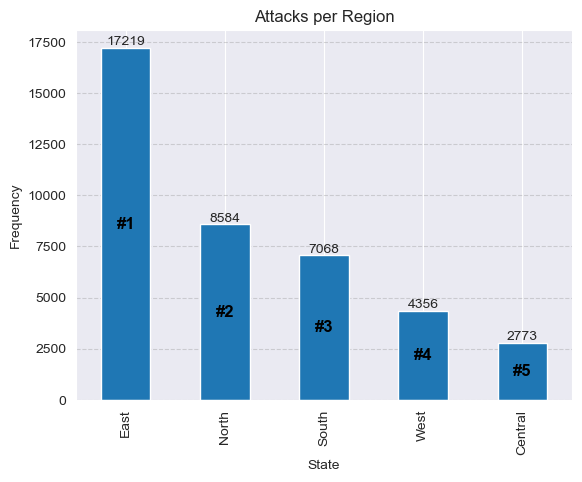

In [186]:
region_mapping = {
    "North": ["Jammu and Kashmir", "Himachal Pradesh", "Punjab", "Uttarakhand", "Haryana", "Delhi", "Rajasthan",
              "Uttar Pradesh", "Chandigarh"],
    "East": ["Bihar", "Jharkhand", "Odisha", "West Bengal", "Sikkim", "Assam", "Meghalaya", "Tripura", "Nagaland",
             "Manipur", "Mizoram", "Arunachal Pradesh"],
    "South": ["Tamil Nadu", "Karnataka", "Kerala", "Andhra Pradesh", "Telangana", "Puducherry", "Lakshadweep"],
    "West": ["Goa", "Maharashtra", "Gujarat", "Dadra and Nagar Haveli", "Daman and Diu"],
    "Central": ["Madhya Pradesh", "Chhattisgarh"],
}


def get_region(state):
    for region, states in region_mapping.items():
        if state in states:
            return region
    return "Unknown"  # If the state is not found


df['state'] = df['Geo-location Data'].str.extract(r',\s*(.*)')
df['city'] = df['Geo-location Data'].str.extract(r'(.*),\s*')
df[['city', 'state', 'Attack Type']].groupby(['city', 'state']).size()
df["Region"] = df["state"].apply(get_region)
print(df['Region'].value_counts())
ax = df['Region'].value_counts().plot(kind='bar', y='Region', x='state', ylabel='Frequency', xlabel='State', title='Attacks per Region')
ax.bar_label(ax.containers[0])
ax.grid(axis='y', color='gray', linestyle='--', alpha=0.3)
for i, bar in enumerate(ax.containers[0]):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'#{i + 1}', ha='center', va='center',
            color='black', fontsize=12, fontweight='bold')

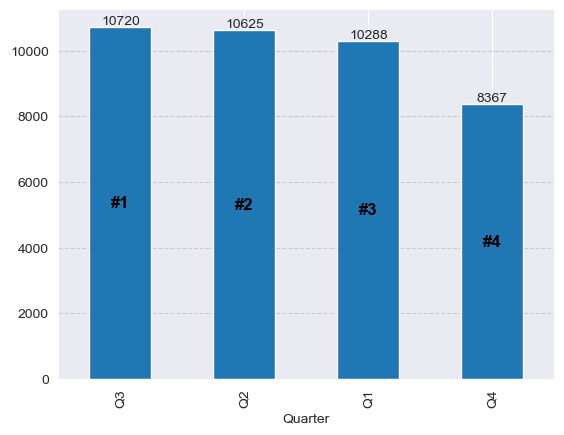

In [187]:
# Insight No 2
# df.groupby(['state','Severity Level', 'Attack Type']).size()#[df["Anomaly Scores"] > 90]#.size()
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.strftime('%B')
month_to_quarter = {
    "January": "Q1", "February": "Q1", "March": "Q1",
    "April": "Q2", "May": "Q2", "June": "Q2",
    "July": "Q3", "August": "Q3", "September": "Q3",
    "October": "Q4", "November": "Q4", "December": "Q4"
}

df['Quarter'] = df['Month'].map(month_to_quarter)
ax = df['Quarter'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
ax.grid(axis='y', color='gray', linestyle='--', alpha=0.3)
for i, bar in enumerate(ax.containers[0]):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'#{i + 1}', ha='center', va='center',
            color='black', fontsize=12, fontweight='bold')

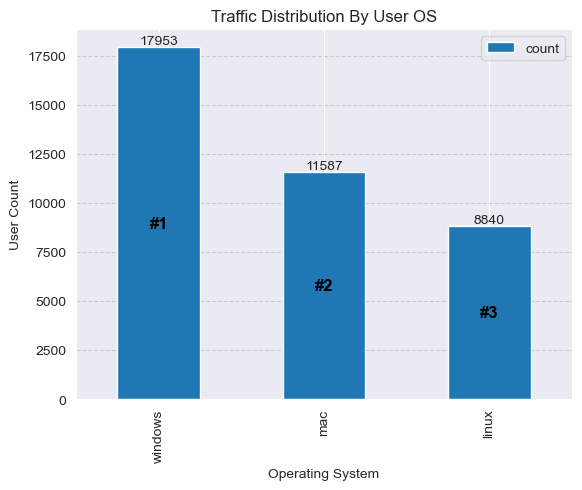

In [188]:
# Insight No 3

windows = df[df["Device Information"].str.contains("Windows")]
linux = df[df["Device Information"].str.contains("Linux")]
mac = df[df["Device Information"].str.contains("Mac OS")]
os_df = pd.DataFrame({
    "OS": ["windows","linux","mac"],
    "count": [windows.shape[0],linux.shape[0],mac.shape[0]]
})
os_df = os_df.sort_values(by='count', ascending=False)

ax = os_df.plot(
    x= "OS",
    y = "count",
    kind='bar',
    title='Traffic Distribution By User OS',
    xlabel="Operating System",
    ylabel="User Count")
ax.bar_label(ax.containers[0])
ax.grid(axis='y', color='gray', linestyle='--', alpha=0.3)
for i, bar in enumerate(ax.containers[0]):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'#{i + 1}', ha='center', va='center',
            color='black', fontsize=12, fontweight='bold')

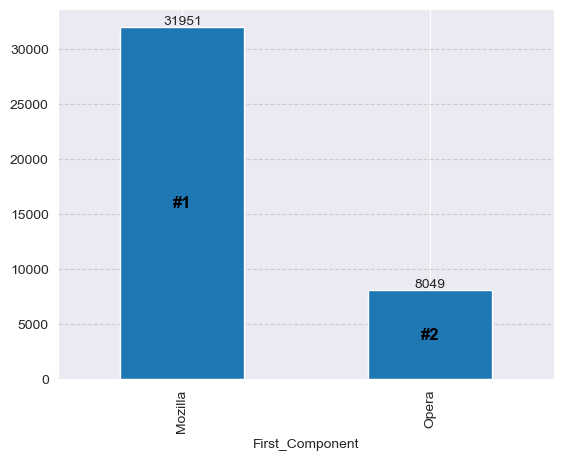

In [189]:
# Insight No 4
df['First_Component'] = df['Device Information'].str.split('/').str[0].str.strip()
ax = df['First_Component'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
ax.grid(axis='y', color='gray', linestyle='--', alpha=0.3)
for i, bar in enumerate(ax.containers[0]):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'#{i + 1}', ha='center', va='center',
            color='black', fontsize=12, fontweight='bold')

In [168]:
# Insight No 5
import pandas as pd

port_labels = ["well_known", "registered", "ephemeral"]
bins = [0, 1023, 49151, 65535]

# Categorize ports
df['source_category'] = pd.cut(
    df['Source Port'],
    bins=bins,
    labels=port_labels,
    include_lowest=True
)
df['dest_category'] = pd.cut(
    df['Destination Port'],
    bins=bins,
    labels=port_labels,
    include_lowest=True
)

# Count occurrences and ensure all categories appear (even with zero counts)
source_counts = df['source_category'].value_counts().reindex(port_labels, fill_value=0)
dest_counts = df['dest_category'].value_counts().reindex(port_labels, fill_value=0)

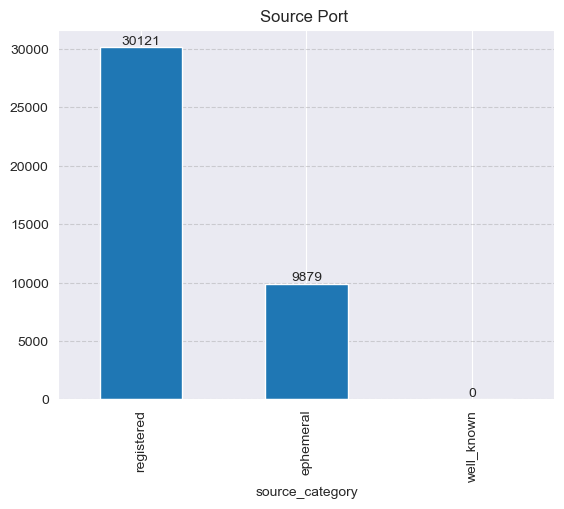

In [193]:
ax = df["source_category"].value_counts().plot(kind='bar', title="Source Port ")
ax.bar_label(ax.containers[0])
ax.grid(axis='y', color='gray', linestyle='--', alpha=0.3)

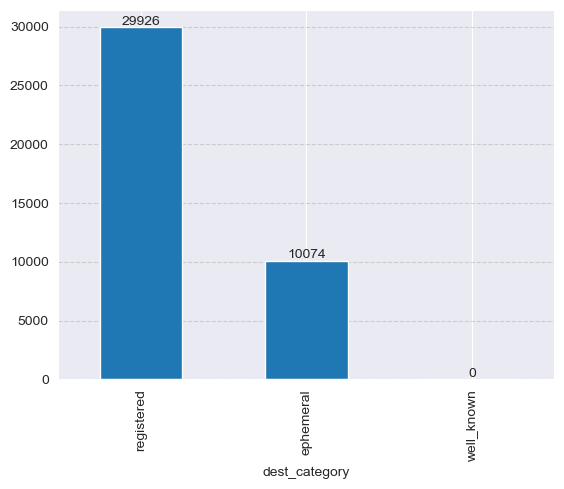

In [196]:
ax = df["dest_category"].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
ax.grid(axis='y', color='gray', linestyle='--', alpha=0.3)

In [194]:
# df[df['source_category'].str.contains("ephemeral")]["Payload Data"].str.len().sort_values(ascending=False).plot(kind='line')
# df.plot(kind="bar",subplots=True,layout=(3,3))
# df.dtypes